In [1]:
import numpy as np

## Problem 1

In [2]:
def reflectMult(A, w):
  n = w.size
  Q = np.eye(n) - 2*np.outer(w, w)/np.dot(w, w)
  for i in range(A.shape[1]):
    A[:, i] = Q@A[:, i]

In [3]:
for i in range(50):
  A=np.random.rand(100,50)
  B=np.copy(A)
  reflectMult(B,np.eye(100)[:,i]-B[:,i]/np.linalg.norm(B[:,i]))
  print(np.allclose(B[:,i],np.eye(100)[:,i]*np.linalg.norm(A[:,i])))
  print(np.allclose(np.linalg.norm(B),np.linalg.norm(A)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Problem 2

In [4]:
def myQR(A):
  m, n = A.shape
  q = np.zeros((m, n))
  R = np.copy(A)
  for i in range (n):
    x = np.copy(R[i:, i])
    y = np.linalg.norm(x)
    if(y == 0):
      continue
    elif(x[0] < 0):
      y = (-1)*y
    x[0] += y
    q[i:, i] += x
    reflectMult(R[i:, i:], x)
  return q, R[:n,:]

In [5]:
def assembleQ(q):
  m,n=q.shape
  Q=np.eye(m)
  for i in range(n):
    reflectMult(Q,q[:,n-1-i])
  return Q

In [6]:
A=np.random.rand(100,50)
q,R=myQR(A)
Q=assembleQ(q)
np.allclose(Q[:,:50]@R,A)

True

## Problem 3

In [7]:
def upperbSub(A,b):
  n=len(A)
  x=np.zeros(n)
  x[n-1]=b[n-1]/A[n-1,n-1]
  for i in range(1,n):
    x[n-1-i]=1/A[n-1-i,n-1-i]*(b[n-1-i]-np.dot(A[n-1-i,n-i:],x[n-i:]))
  return x

In [8]:
def myLS(A, b):
  q, R = myQR(A)
  Q = assembleQ(q)
  Q_transpose = np.transpose(Q)
  x = upperbSub(R, Q_transpose@b)
  return x

In [9]:
A=np.random.rand(100,50)
b=np.random.rand(100)
x=myLS(A,b)
np.allclose(x,np.linalg.lstsq(A,b,rcond=None)[0])

True

## Problem 4

In [10]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [11]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [12]:
cd UCSD class/170A

/content/gdrive/MyDrive/UCSD class/170A


In [13]:
ls

life_test.csv  life_train.csv


In [14]:
import pandas as pd
from matplotlib import pyplot as plt
df_train=pd.read_csv("life_train.csv")
df_test=pd.read_csv("life_test.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2fa708d10>,
      dtype=object)

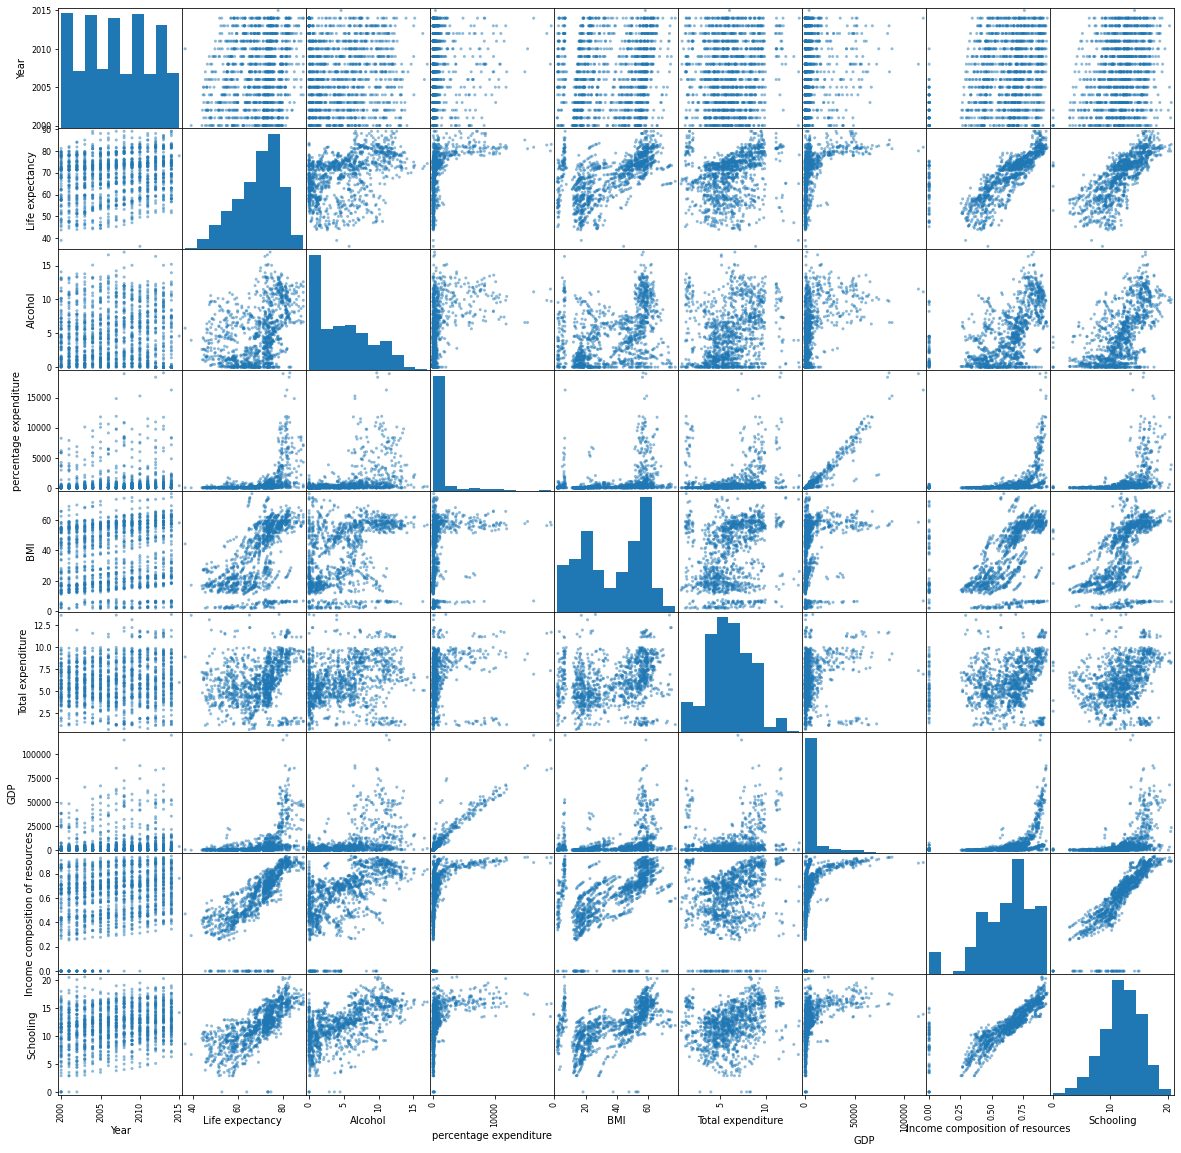

In [17]:
pd.plotting.scatter_matrix(df_train,figsize=(20,20))

In [18]:
X_train=np.zeros((df_train.shape[0],8))
X_train[:,7]=1
X_train[:,:7]=df_train.iloc[:,3:10].to_numpy()
Y_train=df_train.iloc[:,2].to_numpy()

In [19]:
df_test.shape
X_test=np.zeros((df_test.shape[0],8))
X_test[:,7]=1
X_test[:,:7]=df_test.iloc[:,3:10].to_numpy()
Y_test=df_test.iloc[:,2].to_numpy()

In [20]:
weights=myLS(X_train,Y_train)
def predict(x):
  return np.dot(weights,x)

In [47]:
df_test

,Country,Year,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,GDP,Income composition of resources,Schooling
0,Iraq,2014,67.9,0.01,43.524080,58.5,5.54,673.747370,0.658,10.1
1,Equatorial Guinea,2003,53.8,7.13,309.783459,19.5,2.23,3577.176197,0.554,8.4
2,El Salvador,2009,71.4,2.55,416.433840,52.1,6.83,3366.482133,0.662,12.8
3,Namibia,2001,56.5,5.09,205.807883,25.1,6.18,1834.294860,0.556,11.7
4,Solomon Islands,2000,65.8,0.71,4.249261,37.9,4.56,154.518572,0.455,7.2
...,...,...,...,...,...,...,...,...,...,...
836,Philippines,2001,66.8,4.54,69.020425,18.3,3.00,957.287441,0.622,11.4
837,Sao Tome and Principe,2006,64.7,5.46,47.089311,24.0,7.84,843.894470,0.521,10.2
838,Azerbaijan,2013,72.2,2.14,275.651493,5.6,5.54,7875.756953,0.745,11.9
839,Belize,2005,69.0,6.25,365.799896,43.8,4.45,3933.332215,0.695,12.8


In [22]:
predict(X_test[785])

81.23948201277952

In [23]:
predict(X_test[702])

81.8941112488582

In [24]:
Y_test[702]

82.1

The predicted value for average life expecatancy in the Spain from 2011 is about 81.89 while the true value is 82.1.

In [25]:
predict(X_test[383])

59.55041037133907

In [26]:
Y_test[383]

59.3

The predicted value for average life expecatancy in the Cambodia from 2002 is about 59.55 while the true value is 59.3.

In [27]:
predict(X_test[186])

74.61174679928229

In [28]:
Y_test[186]

83.5

The predicted value for average life expecatancy in the Japan from 2013 is about 74.61 while the true value is 83.5.

In [29]:
errors=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
  errors[i]=Y_test[i]-predict(X_test[i,:])
print(np.average(errors))
print(np.average(np.abs(errors)))
print(np.std(errors))

-0.3802766160910282
4.321790858693389
5.733845434704198


(array([ 1.,  0.,  1.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  5.,  4.,
         1.,  1.,  2.,  1.,  2.,  1.,  5.,  6.,  0.,  2.,  8.,  6.,  3.,
         7.,  7., 11., 13., 14., 12., 16., 13., 13., 15., 15., 16., 17.,
        25., 31., 27., 38., 34., 21., 28., 23., 41., 29., 40., 34., 22.,
        33., 24., 18., 16., 24., 14., 12.,  9., 14.,  5.,  6.,  6.,  9.,
         4.,  1.,  5.,  4.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-20.33219829, -19.87955388, -19.42690947, -18.97426506,
        -18.52162065, -18.06897624, -17.61633182, -17.16368741,
        -16.711043  , -16.25839859, -15.80575418, -15.35310977,
        -14.90046536, -14.44782095, -13.99517654, -13.54253213,
        -13.08988772, -12.63724331, -12.1845989 , -11.73195449,
        -11.27931008, -10.82666567, -10.37402126,  -9.92137685,
         -9.46873244,  -9.01608803,  -8.56344361, 

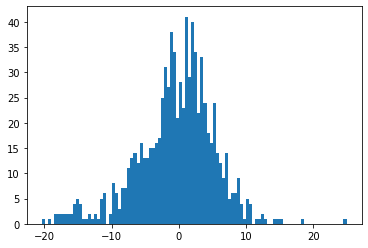

In [30]:
plt.hist(errors,bins=100)

## Problem 5

In [31]:
def encoderMatrix(samples,size):
  x=np.linspace(0,1,samples)
  A=np.zeros((samples,size))
  for i in range(size):
    A[:,i]=np.sin((i+1)*np.pi*x)
  return x, A

In [32]:
x, A=encoderMatrix(1000,20)

In [33]:
f=x*np.exp(np.cos(10*x))
z=myLS(A,f)

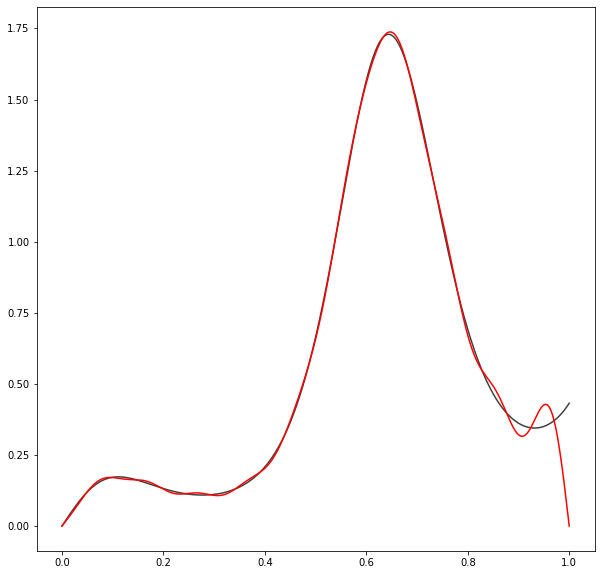

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(x,f,"k",alpha=.75)
plt.plot(x,A@z,"r")

In [35]:
x_1, A_1=encoderMatrix(1000,100)

In [36]:
f_1=x_1*np.exp(np.cos(10*x_1))
z_1=myLS(A_1,f_1)

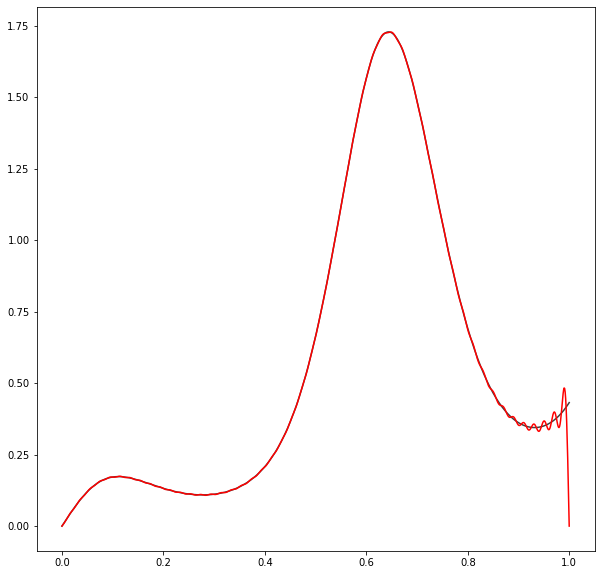

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(x_1,f_1,"k",alpha=.75)
plt.plot(x_1,A_1@z_1,"r")

By adding more basis function, the compression result of signal was more of accuracy compared with before, the difference between compression and original was nearly negligible in the whole range of x-axis only except for the very end part which is an example of Gibbs phenomenon, while in the previous run which is with only 20 basis function, there was indeed notable discrepancies along the function.

In [38]:
error = f - A@z
np.linalg.norm(error)

1.379339998555245

In [39]:
error_1 = f_1 - A_1@z_1
np.linalg.norm(error_1)

0.6895101477738144

By the 5 fold increase for the basis functions used, the error is about half of before, but we have to notice the runtime has increased to about five times compared with before due to the adding of more basis elements. From an engineer's perspective, adding more basis elements would surely reduce the error incurred in the process, but we have to reach a balance point between the error reduced and time elapsed as the marginal benefit for adding more basis would be constantly decreasing and the time cost would continue to rise up.

In [40]:
def encoderMatrix1(samples,size):
  x=np.linspace(0,1,samples)
  A=np.zeros((samples,size))
  for i in range(size):
    A[:,i]=np.sin((i+1)*x)
  return x, A

In [41]:
x, A=encoderMatrix1(1000,20)
f=x*np.exp(np.cos(10*x))
z=myLS(A,f)

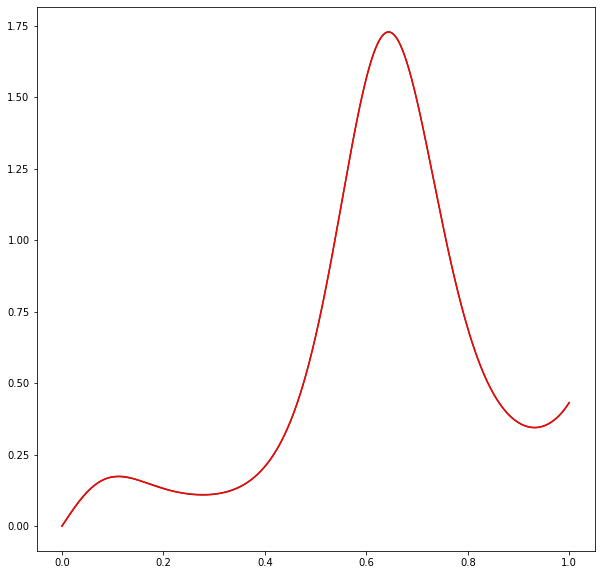

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(x,f,"k",alpha=.75)
plt.plot(x,A@z,"r")

In [43]:
x_1, A_1=encoderMatrix1(1000,100)
f_1=x_1*np.exp(np.cos(10*x_1))
z_1=myLS(A_1,f_1)

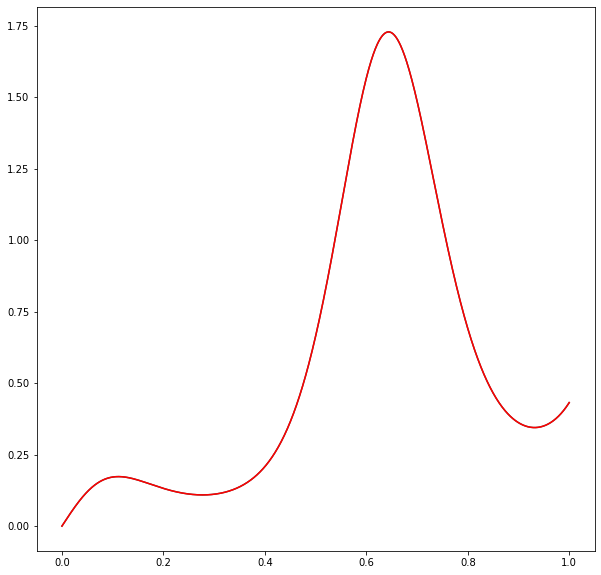

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(x_1,f_1,"k",alpha=.75)
plt.plot(x_1,A_1@z_1,"r")

Empty space for format

In [45]:
error = f - A@z
np.linalg.norm(error)

0.0181197824091448

In [46]:
error_1 = f_1 - A_1@z_1
np.linalg.norm(error_1)

2.9436221561914452e-12

The error is reduced to a great extent for the second method, which is because the columns used in the second is closer to orthogonal compared with the first one. Definitely the second one is better. 